<a href="https://colab.research.google.com/github/Descartess/DeepLearning/blob/master/IMDB-Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading the data

replace the load function from numpy so that the default value for `allow_pickle=True`
this is achieved using lambdas think closures in swift

In [1]:
from keras.datasets import imdb
import numpy as np

np_load_old = np.load

np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

np.load = np_load_old


max([max(sequence) for sequence in train_data])

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


9999

### Preparing the data



```
Using one hot encoding to prepare the data. manual method below
```



In [2]:
def vectorise_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Using the numpy method to do one hot encoding

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the network

In [4]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])



Instructions for updating:
Colocations handled automatically by placer.


### Training the model

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.5084 - binary_accuracy: 0.7812 - val_loss: 0.3795 - val_binary_accuracy: 0.8687
Epoch 2/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.3004 - binary_accuracy: 0.9048 - val_loss: 0.3004 - val_binary_accuracy: 0.8896
Epoch 3/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2179 - binary_accuracy: 0.9287 - val_loss: 0.3086 - val_binary_accuracy: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1750 - binary_accuracy: 0.9439 - val_loss: 0.2840 - val_binary_accuracy: 0.8831
Epoch 5/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8871
Epoch 6/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.1150 - binary_

### Validating our approach

In [6]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

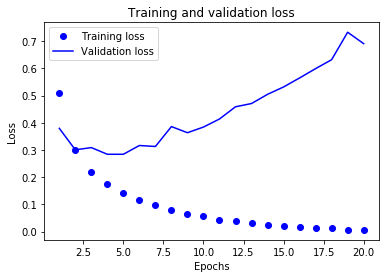

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
training_accuracy = history_dict['binary_accuracy']
validation_accuracy = history_dict['val_binary_accuracy']

epochs = range(1, len(training_accuracy)+1)

plt.plot(epochs, loss_values,'bo',label='Training loss')
plt.plot(epochs, val_loss_values,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

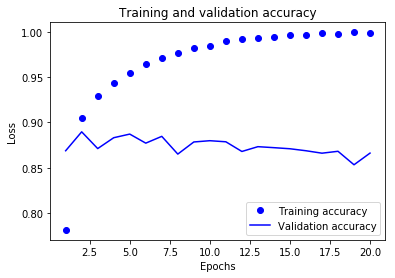

In [8]:
plt.plot(epochs, training_accuracy,'bo',label='Training accuracy')
plt.plot(epochs, validation_accuracy,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

### Reducing Overfitting
1. Reducing network size


In [9]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

history_dict = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.6050 - binary_accuracy: 0.7685 - val_loss: 0.5338 - val_binary_accuracy: 0.8322
Epoch 2/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.4635 - binary_accuracy: 0.8736 - val_loss: 0.4312 - val_binary_accuracy: 0.8627
Epoch 3/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.3712 - binary_accuracy: 0.8937 - val_loss: 0.3685 - val_binary_accuracy: 0.8749
Epoch 4/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.3052 - binary_accuracy: 0.9095 - val_loss: 0.3337 - val_binary_accuracy: 0.8757
Epoch 5/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2585 - binary_accuracy: 0.9204 - val_loss: 0.3015 - val_binary_accuracy: 0.8868
Epoch 6/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2233 - binary_accuracy: 0.9293 - val_loss: 0.2844 - val_binary_

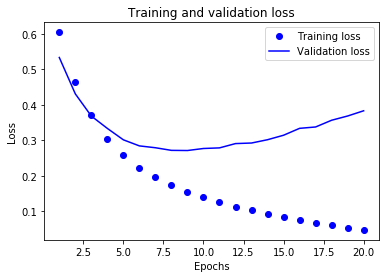

In [10]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
training_accuracy = history_dict['binary_accuracy']
validation_accuracy = history_dict['val_binary_accuracy']

epochs = range(1, len(training_accuracy)+1)

plt.plot(epochs, loss_values,'bo',label='Training loss')
plt.plot(epochs, val_loss_values,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

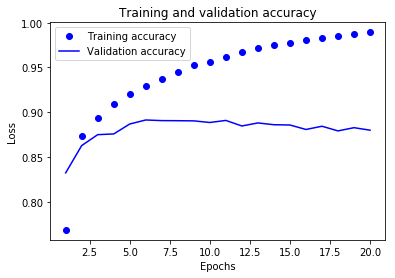

In [11]:
plt.plot(epochs, training_accuracy,'bo',label='Training accuracy')
plt.plot(epochs, validation_accuracy,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()